In [1]:
import os
os.chdir('../..')
from BM_2Sphere.run import *


In [27]:
config_dir = "BM_2Sphere/configs/train_lstm.yaml"
with open(config_dir) as file:
        config = ml_collections.ConfigDict(yaml.safe_load(file))
model = get_model(config)
model_path(config)
model.module.load_state_dict(torch.load(config.path), strict=False)
LSTM = model.to(config.device)

batch_size: 64
comment: null
dataset: BM_2Sphere
device: cuda
drop_rate: 0
epochs: 300
gamma: 0.998
gpu_id: '3'
lr: 0.003
model: LSTM
n_hidden1: 32
n_hidden2: 64
optimizer: Adam
param: a
pretrained: false
seed: 0
train: true
weight_decay: 0.0

Number of parameters: 30595
GPU's available: 4
Let's use 4 GPUs!
WARNING! The model exists in directory and will be overwritten


In [28]:
config_dir = "BM_2Sphere/configs/train_lstm_dev.yaml"
with open(config_dir) as file:
        config = ml_collections.ConfigDict(yaml.safe_load(file))
model = get_model(config)
model_path(config)
model.module.load_state_dict(torch.load(config.path), strict=False)
LSTM_dev = model.to(config.device)

batch_size: 64
comment: null
dataset: BM_2Sphere
device: cuda
drop_rate: 0
epochs: 300
gamma: 0.998
gpu_id: '1'
lr: 0.003
model: LSTM_development
n_hidden1: 32
n_hidden2: 64
optimizer: Adam
param: orthogonal
pretrained: false
scheduler: exponential
seed: 0
train: true
weight_decay: 0.0

Number of parameters: 30976
GPU's available: 4
Let's use 4 GPUs!
WARNING! The model exists in directory and will be overwritten


In [4]:
config_dir = "BM_2Sphere/configs/train_exprnn.yaml"
with open(config_dir) as file:
        config = ml_collections.ConfigDict(yaml.safe_load(file))
model = get_model(config)
model_path(config)
model.module.load_state_dict(torch.load(config.path), strict=False)
exprnn = model.to(config.device)

batch_size: 64
comment: null
dataset: BM_2Sphere
device: cuda
drop_rate: 0
epochs: 300
gamma: 0.998
gpu_id: '0'
lr: 0.003
mode: exprnn
model: Exprnn
n_hidden1: 32
n_hidden2: 64
optimizer: Adam
param: a
patience: 50
pretrained: false
scheduler: exponential
seed: 0
train: true
weight_decay: 0.0

Number of parameters: 11715
GPU's available: 4
Let's use 4 GPUs!
WARNING! The model exists in directory and will be overwritten


In [5]:
# load dataset
dataloaders, test_loader = get_dataset(config)

In [31]:
inputs,outputs,LSTM_out,LSTM_dev_out,exprnn_out = [], [], [],[],[]
with torch.no_grad():
    for i,(x,y) in enumerate(test_loader):
        #print(i)
        x = x.to(config.device)
        inputs.append(x)
        outputs.append(y)
        LSTM_dev_out.append(LSTM_dev(x))
        LSTM_out.append(LSTM(x))
        exprnn_out.append(exprnn(x))

LSTM_out = torch.cat(LSTM_out)
LSTM_dev_out =  torch.cat(LSTM_dev_out)
outputs = torch.cat(outputs)
exprnn_out = torch.cat(exprnn_out)

In [8]:
from BM_2Sphere.dataloader import visualize 

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
def visualization(sample_id,outputs,LSTM_out,LSTM_dev_out,exprnn_out):

    true_path = outputs[sample_id].cpu().numpy()
    lstm_path = LSTM_out[sample_id].cpu().numpy()
    lstm_dev_path = LSTM_dev_out[sample_id].cpu().numpy()
    exprnn_path = exprnn_out[sample_id].cpu().numpy()
    
    
    
    v = np.linspace(0, 2*np.pi, 100)
    u = np.linspace(0, np.pi, 100)

    x_sphere = np.outer(np.sin(u), np.sin(v))
    y_sphere = np.outer(np.sin(u), np.cos(v))
    z_sphere = np.outer(np.cos(u), np.ones_like(v))
    sns.set_theme()
    color_list = ['m','r','g']
    
    
    fig = plt.figure(figsize=plt.figaspect(0.3))
    ax = fig.add_subplot(1, 4, 1, projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.plot_surface(x_sphere, y_sphere, z_sphere, color="y", alpha=0.2)
    for i in range(len(sample_id)):
        ax.plot3D(true_path[i,:,0], true_path[i,:,1], true_path[i,:,2],color_list[i] ,linewidth=0.8,alpha=0.8)
    ax.set_title('True')
    
    ax = fig.add_subplot(1, 4, 2, projection='3d')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.plot_surface(x_sphere, y_sphere, z_sphere, color="y", alpha=0.2)
    for i in range(len(sample_id)):
        ax.plot3D(lstm_dev_path[i,:,0], lstm_dev_path[i,:,1], lstm_dev_path[i,:,2], color_list[i],linewidth=0.8,alpha=0.8)
    ax.set_title('LSTM_DEV(SO)')
    
    ax = fig.add_subplot(1, 4, 3, projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.plot_surface(x_sphere, y_sphere, z_sphere, color="y", alpha=0.2)
    for i in range(len(sample_id)):
        ax.plot3D(lstm_path[i,:,0], lstm_path[i,:,1], lstm_path[i,:,2], color_list[i],linewidth=0.8,alpha=0.8)
    ax.set_title('LSTM')
    
    ax = fig.add_subplot(1, 4, 4, projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.plot_surface(x_sphere, y_sphere, z_sphere, color="y", alpha=0.2)
    for i in range(len(sample_id)):
        ax.plot3D(exprnn_path[i,:,0],exprnn_path[i,:,1], exprnn_path[i,:,2], color_list[i],linewidth=0.8,alpha=0.8)
    ax.set_title('ExpRNN')
    fig.tight_layout(rect=[0, 0, 0.95,1],w_pad=1.5)
    fig.savefig('BM_2Sphere/notebooks/BM_2Sphere_plot.png',format='png',dpi=350)

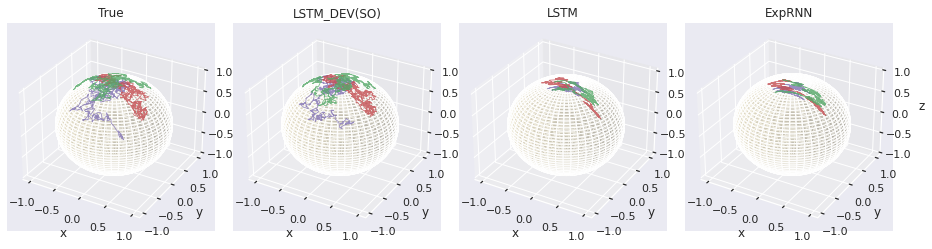

In [36]:
# without cherry picking, one can set list of random sample ids to visualize 
sample_ids = [2,3,4]
visualization(sample_ids,outputs,LSTM_out,LSTM_dev_out,exprnn_out)